In [2]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
from decimal import *
import pandas as pd
from math import *
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import ascii
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
from astropy.cosmology import WMAP9 as cosmo
plt.style.use(["science","stylesheet.txt"])

In [3]:
%store -r comparison

In [4]:
df = comparison.copy()

In [5]:
df.loc[(df['id'] == "XMM_113"), "Mstell"] = np.nan
df.loc[(df['id'] == "XMM_113"), "SFR_c"] = np.nan
df.loc[(df['id'] == "XMM_113"), "sSFR_c"] = np.nan
df['phot_z'] = [0.81,0.82, 0.74,0.98, 1.1, 1.1, 1.7,1.7, 0.79,0.96, 1.38, 1.45, 1.45, 0.88, 0.99, 0.99, 1.04, 1.38, 1.40, 1.60,1.65, 1.70, 1.6, 0.9, 1.0, 0.81]

In [6]:
df['sSFR_gyr'] = df['sSFR']*1e9
df['sSFR_c_gyr'] = df['sSFR_c']*1e9
df['sSFR_err_gyr'] = df['sSFR_err']*1e9

In [7]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
df['Age'] = cosmo.age(df['redshift'])
df['sSFR_MS'] = 26 * df['Age']**(-2.2)
df['Age_c'] = cosmo.age(df['phot_z'])
df['sSFR_MS_c'] = 26 * df['Age_c']**(-2.2)

In [8]:
df.to_csv("/Users/arames52/Desktop/cigale_results.csv")

In [9]:
ms_cdfs = ["CDFS-18", "CDFS-19"]
ms_es1 = ["ES1-12","ES1-18","ES1-25","ES1-26","ES1-34","ES1-35"]
ms_xmm = ["XMM-11","XMM-19","XMM-27","XMM-29","XMM-30"]
ms_bcgs = ms_cdfs + ms_es1 + ms_xmm
sb_es1_bcgs = ["ES1_z_0.88", "ES1_z_0.99", "ES1_z_0.99b", "ES1_z_1.04", "ES1_z_1.38", "ES1_z_1.40", "ES1_z_1.60", "ES1_z_1.65", "ES1_z_1.70"]
sb_xmm_bcgs = ["XMM_113", "XMM_z_0.9", "XMM_z_1.0", "XMM_z_0.81"]
sb_bcgs = sb_es1_bcgs + sb_xmm_bcgs
all_bcgs = ms_bcgs + sb_bcgs

In [10]:
ms_results = df[df['id'].isin(ms_bcgs)].reset_index(drop = True)
sb_results = df[df['id'].isin(sb_bcgs)].reset_index(drop = True)

In [11]:
spec_z = ['CDFS-18', 'CDFS-19', "ES1-12","ES1-18","ES1-25","ES1-26", "XMM-19", "XMM_z_0.9", "XMM_z_1.0", "XMM_z_0.81",
         "ES1_z_0.88", "ES1_z_0.99", "ES1_z_0.99b", "ES1_z_1.70"]

In [12]:
ms_specz = ms_results[ms_results['id'].isin(spec_z)]
sb_specz = sb_results[sb_results['id'].isin(spec_z)]

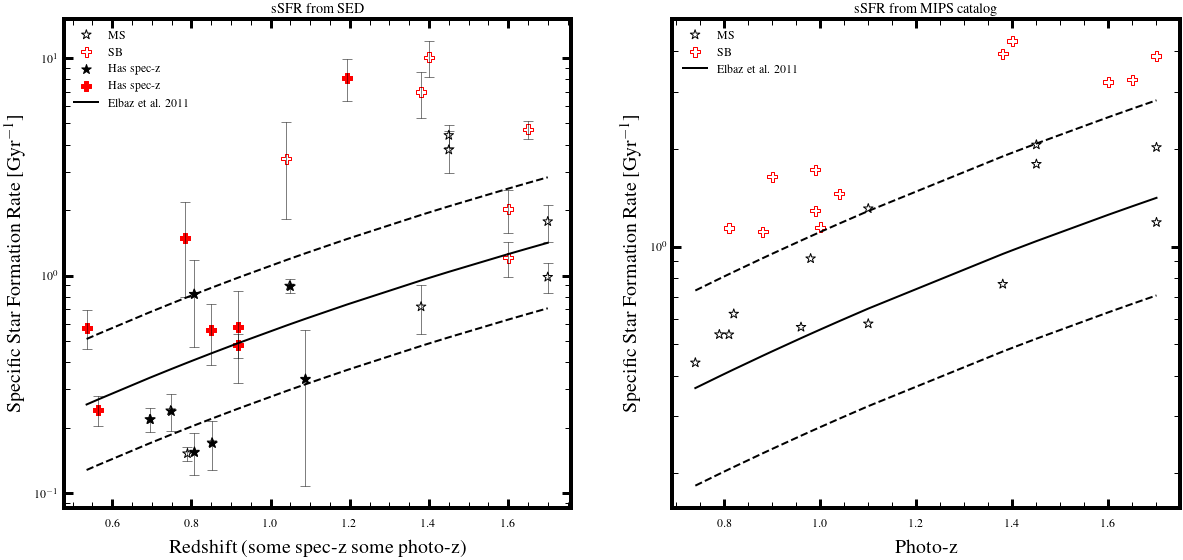

In [13]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (20,9))
ax[0].scatter(ms_results['redshift'], ms_results['sSFR_gyr'], color = 'black', label = 'MS', marker = '*',facecolors='none')
ax[0].errorbar(ms_results['redshift'], ms_results['sSFR_gyr'], yerr = ms_results['sSFR_err_gyr'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# for i, txt in enumerate(ms_results['index']):
#     ax[0].annotate(txt, (ms_results['redshift'][i], ms_results['sSFR_gyr'][i] - 0.04))
ax[0].scatter(sb_results['redshift'], sb_results['sSFR_gyr'], color = 'red', label = "SB", marker = 'P',facecolors='none')
ax[0].errorbar(sb_results['redshift'], sb_results['sSFR_gyr'], yerr = sb_results['sSFR_err_gyr'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# for i, txt in enumerate(sb_results['index']):
#     ax[0].annotate(txt, (sb_results['redshift'][i], sb_results['sSFR_gyr'][i]- 0.04))
ax[0].set_yscale('log')

# ax[0].scatter(nr_data['redshift'], nr_data['sSFR_gyr'], marker = 'o', facecolors = 'none', color = 'green', linewidth = 1, s = 200)
ax[0].scatter(ms_specz['redshift'], ms_specz['sSFR_gyr'], marker = '*', color = 'black', linewidth = 1, label = 'Has spec-z')
ax[0].scatter(sb_specz['redshift'], sb_specz['sSFR_gyr'], marker = 'P', color = 'red', linewidth = 1, label = 'Has spec-z')
ax[0].set_ylabel("Specific Star Formation Rate [Gyr$^{-1}$]")
ax[0].set_xlabel("Redshift (some spec-z some photo-z)")
ax[0].plot(sorted(df['redshift']),sorted(df['sSFR_MS']), color = 'black', linewidth = 2, label = 'Elbaz et al. 2011')
ax[0].plot(sorted(df['redshift']),sorted(df['sSFR_MS']*2), color = 'black', ls = "--", linewidth = 2)
ax[0].plot(sorted(df['redshift']),sorted(df['sSFR_MS']/2), color = 'black', ls = "--", linewidth = 2)
ax[0].set_title("sSFR from SED")
ax[0].legend()

ax[1].scatter(ms_results['phot_z'], ms_results['sSFR_c_gyr'], color = 'black', label = 'MS', marker = '*',facecolors='none')
ax[1].scatter(sb_results['phot_z'], sb_results['sSFR_c_gyr'], color = 'red', label = "SB", marker = 'P',facecolors='none')
# for i, txt in enumerate(ms_results['index']):
#     ax[1].annotate(txt, (ms_results['phot_z'][i], ms_results['sSFR_c_gyr'][i]- 0.1))
# for i, txt in enumerate(sb_results['index']):
#     ax[1].annotate(txt, (sb_results['phot_z'][i], sb_results['sSFR_c_gyr'][i]- 0.1))
# ax[1].scatter(df_specz['phot_z'], df_specz['sSFR_c_gyr'], marker = '+', color = 'blue', linewidth = 1, label = 'Have Spec-z')

# ax[1].scatter(ms_results['redshift'], ms_results['sSFR_c_gyr'], color = 'black', label = 'MS', marker = 'o',facecolors='none')
# for i, txt in enumerate(ms_results['index']):
#     ax[1].annotate(txt, (ms_results['redshift'][i] - 0.05, ms_results['sSFR_c'][i]))
# ax[1].scatter(sb_results['redshift'], sb_results['sSFR_c_gyr'], color = 'red', label = "SB", marker = '^',facecolors='none')
# for i, txt in enumerate(sb_results['index']):
#     ax[1].annotate(txt, (sb_results['redshift'][i] - 0.05, sb_results['sSFR_c'][i]))
# ax[1].scatter(df_specz['redshift'], df_specz['sSFR_c_gyr'], marker = '+', color = 'blue', linewidth = 1)

ax[1].set_ylabel("Specific Star Formation Rate [Gyr$^{-1}$]")
ax[1].set_yscale('log')
ax[1].set_xlabel("Photo-z")
ax[1].plot(sorted(df['phot_z']),sorted(df['sSFR_MS_c']), color = 'black', linewidth = 2, label = 'Elbaz et al. 2011')
ax[1].plot(sorted(df['phot_z']),sorted(df['sSFR_MS_c']*2), color = 'black', linewidth = 2, ls = '--')
ax[1].plot(sorted(df['phot_z']),sorted(df['sSFR_MS_c']/2), color = 'black', linewidth = 2, ls = '--')
# ax[1].plot(sorted(df['redshift']),sorted(df['sSFR_MS']), color = 'black')
ax[1].set_title("sSFR from MIPS catalog")
plt.legend()
fig.savefig("ssfr_z.jpg", dpi = 300)

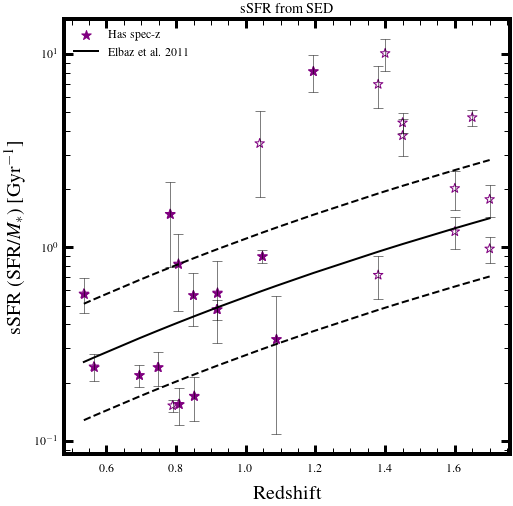

In [14]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize = (8,8))
ax.scatter(ms_results['redshift'], ms_results['sSFR_gyr'], color = 'purple',  marker = '*',facecolors='none')
ax.errorbar(ms_results['redshift'], ms_results['sSFR_gyr'], yerr = ms_results['sSFR_err_gyr'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# for i, txt in enumerate(ms_results['index']):
#     ax[0].annotate(txt, (ms_results['redshift'][i], ms_results['sSFR_gyr'][i] - 0.04))
ax.scatter(sb_results['redshift'], sb_results['sSFR_gyr'], color = 'purple', marker = '*',facecolors='none')
ax.errorbar(sb_results['redshift'], sb_results['sSFR_gyr'], yerr = sb_results['sSFR_err_gyr'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# for i, txt in enumerate(sb_results['index']):
#     ax[0].annotate(txt, (sb_results['redshift'][i], sb_results['sSFR_gyr'][i]- 0.04))
ax.set_yscale('log')

# ax[0].scatter(nr_data['redshift'], nr_data['sSFR_gyr'], marker = 'o', facecolors = 'none', color = 'green', linewidth = 1, s = 200)
ax.scatter(ms_specz['redshift'], ms_specz['sSFR_gyr'], marker = '*', color = 'purple', linewidth = 1, label = 'Has spec-z')
ax.scatter(sb_specz['redshift'], sb_specz['sSFR_gyr'], marker = '*', color = 'purple', linewidth = 1)
ax.set_ylabel("sSFR (SFR/$M_*$) [Gyr$^{-1}$]")
ax.set_xlabel("Redshift")
ax.plot(sorted(df['redshift']),sorted(df['sSFR_MS']), color = 'black', linewidth = 2, label = 'Elbaz et al. 2011')
ax.plot(sorted(df['redshift']),sorted(df['sSFR_MS']*2), color = 'black', ls = "--", linewidth = 2)
ax.plot(sorted(df['redshift']),sorted(df['sSFR_MS']/2), color = 'black', ls = "--", linewidth = 2)
ax.set_title("sSFR from SED")
ax.legend()
plt.legend()
fig.savefig("/Users/arames52/Desktop/ssfr_z_sed.jpg", dpi = 300)

In [15]:
sub_ms = ['CDFS-18', 'ES1-26', 'XMM-11']
ms = ['CDFS-19', 'ES1-12', 'ES1-18', 'ES1-25', 'ES1-34', 'ES1-35', 'XMM-19', 'XMM-27', 'ES1_z_0.88', 
     'ES1_z_0.99b', 'ES1_z_1.60', 'ES1_z_1.70', 'XMM_113', 'XMM_z_0.9']
sb = ['XMM-29', 'XMM-30', 'ES1_z_0.99', 'ES1_z_1.04','ES1_z_1.38', 'ES1_z_1.40', 'ES1_z_1.65','XMM_z_1.0', 'XMM_z_0.81']

In [16]:
msspec = list(set(spec_z).intersection(ms))
sbspec = list(set(spec_z).intersection(sb))
sbmsspec = list(set(spec_z).intersection(sub_ms))

In [17]:
ms_spec_z = df[df['id'].isin(msspec)].reset_index(drop = True)
sb_spec_z = df[df['id'].isin(sbspec)].reset_index(drop = True)
sbms_spec_z = df[df['id'].isin(sbmsspec)].reset_index(drop = True)

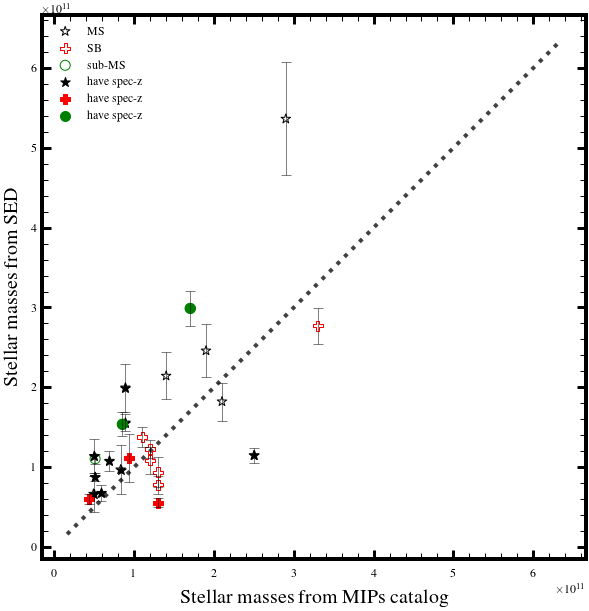

In [18]:
fig,ax = plt.subplots(figsize = (10,10))
ms_res = comparison[comparison['id'].isin(ms)].reset_index(drop = True)
ms_res = ms_res[~(ms_res['id'] == 'XMM_113')].reset_index(drop = True)
sb_res = comparison[comparison['id'].isin(sb)].reset_index(drop = True)
sbms_res = comparison[comparison['id'].isin(sub_ms)].reset_index(drop = True)
ax.scatter(ms_res['Mstell'], ms_res['Stellar_mass'], marker = '*', color = 'black', facecolors = 'none', label = 'MS')
# ax.scatter()
# for i, txt in enumerate(ms_res['index']):
#     ax.annotate(txt, (ms_res['Mstell'][i], ms_res['Stellar_mass'][i]))
ax.errorbar(ms_res['Mstell'], ms_res['Stellar_mass'], yerr = ms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sb_res['Mstell'], sb_res['Stellar_mass'], marker = 'P', color = 'red', label = 'SB', facecolors = 'none')
# for i, txt in enumerate(sb_res['index']):
#     ax.annotate(txt, (sb_res['Mstell'][i], sb_res['Stellar_mass'][i]))
ax.errorbar(sb_res['Mstell'], sb_res['Stellar_mass'], yerr = sb_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(sbms_res['Mstell'], sbms_res['Stellar_mass'], marker = 'o', color = 'green', label = 'sub-MS', facecolors = 'none')
ax.errorbar(sbms_res['Mstell'], sbms_res['Stellar_mass'], yerr = sbms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(ms_spec_z['Mstell'], ms_spec_z['Stellar_mass'], marker = '*', color = 'black', label = 'have spec-z', linewidth = 1)
ax.scatter(sb_spec_z['Mstell'], sb_spec_z['Stellar_mass'], marker = 'P', color = 'red', label = 'have spec-z', linewidth = 1)
ax.scatter(sbms_spec_z['Mstell'], sbms_spec_z['Stellar_mass'], marker = 'o', color = 'green', label = 'have spec-z', linewidth = 1)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# ax.set_xticks([0,2,4])
# ax.set_xticks(np.arange(min(comparison['Mstell']), max(comparison['Mstell']), 1.0e11))
# ax.set_yticks(np.arange(min(comparison['Stellar_mass']), max(comparison['Stellar_mass']), 1.0e11))
# now plot both limits against eachother
ax.plot(lims, lims, ':', color = 'black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel("Stellar masses from MIPs catalog")
ax.set_ylabel("Stellar masses from SED")
plt.legend()
fig.savefig("mstar_sed_mips.jpg", dpi = 300)

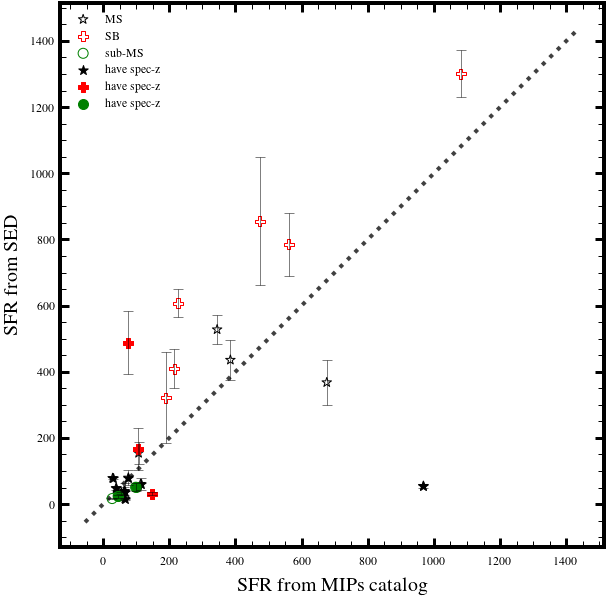

In [19]:
fig,ax = plt.subplots(figsize = (10,10))
ax.scatter(ms_res['SFR_c'], ms_res['SFR'], marker = '*', color = 'black', label = 'MS', facecolors = 'none')
# for i, txt in enumerate(ms_results['index']):
#     ax.annotate(txt, (ms_results['SFR_c'][i], ms_results['SFR'][i]))
ax.errorbar(ms_res['SFR_c'], ms_res['SFR'], yerr = ms_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sb_res['SFR_c'], sb_res['SFR'], marker = 'P', color = 'red', label = 'SB', facecolors = 'none')
# for i, txt in enumerate(sb_results['index']):
#     ax.annotate(txt, (sb_results['SFR_c'][i], sb_results['SFR'][i]))
ax.errorbar(sb_res['SFR_c'], sb_res['SFR'], yerr = sb_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(sbms_res['SFR_c'], sbms_res['SFR'], marker = 'o', color = 'green', label = 'sub-MS', facecolors = 'none')
ax.errorbar(sbms_res['SFR_c'], sbms_res['SFR'], yerr = sbms_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# ax.scatter(df_specz['SFR_c'], df_specz['SFR'], marker = '+', color = 'blue', label = 'have spec-z', linewidth = 1)

ax.scatter(ms_spec_z['SFR_c'], ms_spec_z['SFR'], marker = '*', color = 'black', label = 'have spec-z', linewidth = 1)
ax.scatter(sb_spec_z['SFR_c'], sb_spec_z['SFR'], marker = 'P', color = 'red', label = 'have spec-z', linewidth = 1)
ax.scatter(sbms_spec_z['SFR_c'], sbms_spec_z['SFR'], marker = 'o', color = 'green', label = 'have spec-z', linewidth = 1)
# SFR_c
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, ':', color = 'black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel("SFR from MIPs catalog")
ax.set_ylabel("SFR from SED")
plt.legend()
fig.savefig("sfr_sed_mips.jpg", dpi = 300)

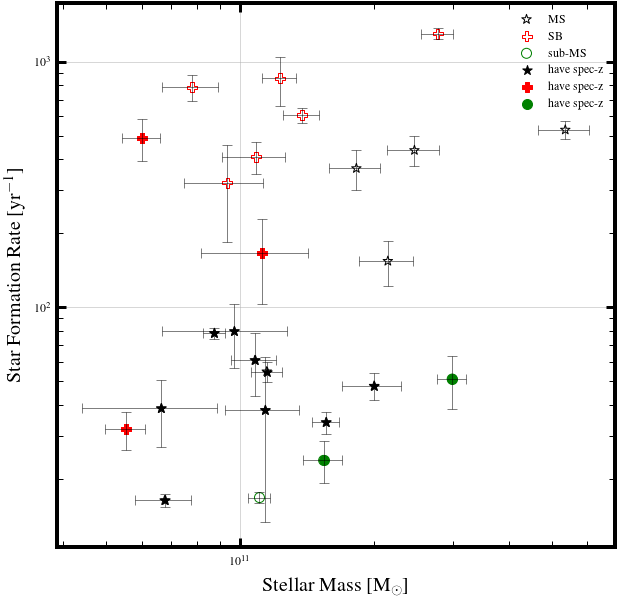

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(ms_res['Stellar_mass'], ms_res['SFR'], marker = '*', facecolors = 'none', color = 'black', label = 'MS')
ax.errorbar(ms_res['Stellar_mass'], ms_res['SFR'], xerr = ms_res['Stellar_mass_err'], yerr = ms_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sb_res['Stellar_mass'], sb_res['SFR'], marker = 'P', facecolors = 'none', color = 'red', label = 'SB')
ax.errorbar(sb_res['Stellar_mass'], sb_res['SFR'], xerr = sb_res['Stellar_mass_err'], yerr = sb_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(sbms_res['Stellar_mass'], sbms_res['SFR'], marker = 'o', facecolors = 'none', color = 'green', label = 'sub-MS')
ax.errorbar(sbms_res['Stellar_mass'], sbms_res['SFR'], xerr = sbms_res['Stellar_mass_err'], yerr = sbms_res['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(ms_spec_z['Stellar_mass'], ms_spec_z['SFR'], marker = '*', color = 'black', label = 'have spec-z', linewidth = 1)
ax.scatter(sb_spec_z['Stellar_mass'], sb_spec_z['SFR'], marker = 'P', color = 'red', label = 'have spec-z', linewidth = 1)
ax.scatter(sbms_spec_z['Stellar_mass'], sbms_spec_z['SFR'], marker = 'o', color = 'green', label = 'have spec-z', linewidth = 1)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# print(xlim)
# print(ylim)
# ax.scatter(df_specz['Stellar_mass'], df_specz['SFR'], marker = 'o', color = 'blue', facecolors = 'none',s=200)
# plt.axhline(y=1000, xmin=43173004270.36472, xmax=311071827329.5904, color='black')
# ax.plot([5*10**10, 3*10**11], [1.5*10*2, 10**3], linewidth = 1, color = 'black', ls = ':')
# ax.plot([10**11, 3*10**11], [10*1.5, 3*10*1.9], linewidth = 1, color = 'black', ls = ':')
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [yr$^{-1}$]")

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.grid()

In [111]:
sb_res

,index,id,SFR,SFR_err,Stellar_mass,Stellar_mass_err,reduced_chi_square,redshift,Mstell,SFR_c,sSFR,sSFR_c,sSFR_err
0,11,XMM-29,606.747053,42.536439,1.375040e+11,1.285298e+10,3.174267,1.450000,1.100000e+11,226.89,4.412579e-09,2.062636e-09,5.155756e-10
1,12,XMM-30,409.878920,59.932236,1.083534e+11,1.738484e+10,1.158509,1.450000,1.200000e+11,215.71,3.782796e-09,1.797583e-09,8.211625e-10
2,14,ES1_z_0.99,487.995269,95.672200,6.013037e+10,5.942690e+09,1.187080,1.193720,4.300000e+10,74.30,8.115621e-09,1.727907e-09,1.781810e-09
3,16,ES1_z_1.04,321.973131,137.118066,9.342061e+10,1.880894e+10,5.089732,1.040000,1.300000e+11,189.41,3.446489e-09,1.457000e-09,1.623512e-09
4,17,ES1_z_1.38,855.147175,193.200457,1.226651e+11,1.083419e+10,5.211054,1.380000,1.200000e+11,472.96,6.971398e-09,3.941333e-09,1.691104e-09
5,18,ES1_z_1.40,784.974270,96.190048,7.792455e+10,1.123757e+10,5.072761,1.400000,1.300000e+11,560.74,1.007352e-08,4.313385e-09,1.906335e-09
6,20,ES1_z_1.65,1301.243994,70.015009,2.771064e+11,2.287002e+10,5.141908,1.650000,3.300000e+11,1080.94,4.695828e-09,3.275576e-09,4.626418e-10
7,24,XMM_z_1.0,31.880793,5.604189,5.535022e+10,5.756976e+09,6.540737,0.535235,1.300000e+11,149.20,5.759831e-10,1.147692e-09,1.176455e-10
8,25,XMM_z_0.81,166.167709,63.008696,1.117928e+11,3.024304e+10,2.400729,0.782721,9.300000e+10,106.15,1.486390e-09,1.141398e-09,6.923580e-10


In [112]:
ms_res

,index,id,SFR,SFR_err,Stellar_mass,Stellar_mass_err,reduced_chi_square,redshift,Mstell,SFR_c,sSFR,sSFR_c,sSFR_err
0,1,CDFS-19,33.963720,3.579866,1.556720e+11,1.063375e+10,1.077784,0.69484,8.900000e+10,55.20,2.181749e-10,6.202247e-10,2.740314e-11
1,2,ES1-12,47.812017,6.006869,1.995936e+11,3.011822e+10,2.378459,0.74744,8.900000e+10,39.03,2.395469e-10,4.385393e-10,4.703564e-11
2,3,ES1-18,79.747198,23.427413,9.692398e+10,3.030716e+10,2.686024,0.80680,8.300000e+10,76.27,8.227809e-10,9.189157e-10,3.530070e-10
3,4,ES1-25,38.085378,24.756857,1.137372e+11,2.141658e+10,1.652896,1.08807,5.000000e+10,65.54,3.348542e-10,1.310800e-09,2.266157e-10
4,6,ES1-34,527.775991,44.067429,5.363627e+11,7.069561e+10,7.016164,1.70000,2.900000e+11,344.60,9.839909e-10,1.188276e-09,1.535290e-10
5,7,ES1-35,435.795776,60.301348,2.459066e+11,3.289271e+10,2.413791,1.70000,1.900000e+11,384.74,1.772201e-09,2.024947e-09,3.410666e-10
6,9,XMM-19,78.394902,3.919745,8.740998e+10,4.867738e+09,5.393139,1.04789,5.100000e+10,28.80,8.968644e-10,5.647059e-10,6.712248e-11
7,10,XMM-27,154.177812,32.596748,2.143111e+11,2.945263e+10,6.010726,1.38000,1.400000e+11,107.28,7.194113e-10,7.662857e-10,1.814094e-10
8,13,ES1_z_0.88,16.339344,1.017821,6.758220e+10,9.687966e+09,2.009905,0.56395,5.900000e+10,65.66,2.417699e-10,1.112881e-09,3.778875e-11
9,15,ES1_z_0.99b,38.697070,11.637309,6.639960e+10,2.232417e+10,1.032901,0.91886,4.900000e+10,63.23,5.827908e-10,1.290408e-09,2.628860e-10


In [21]:
alma_detected = list(morph_df.index)
ms_res = ms_res[ms_res['id'].isin(alma_detected)]
sb_res = sb_res[sb_res['id'].isin(alma_detected)]
sbms_res = sbms_res[sbms_res['id'].isin(alma_detected)]

NameError: name 'morph_df' is not defined

In [ ]:
ms_morph = morph_df[morph_df.index.isin(list(ms_res['id']))]

In [ ]:
sb_morph = morph_df[morph_df.index.isin(list(sb_res['id']))]
subms_morph = morph_df[morph_df.index.isin(list(sbms_res['id']))]

In [ ]:
# fig,ax = plt.subplots(1,1, figsize = (10,10))
# ax.scatter(ms_res['Stellar_mass'], np.array(ms_morph['sersic_ellip']),marker = '*', color = 'black')
# ax.scatter(sb_res['Stellar_mass'], np.array(sb_morph['sersic_ellip']), marker = 'P', color = 'red')
# ax.scatter(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_ellip']), marker = 'o', color = 'green')
# ax.set_xscale('log')
# ax.set_xlabel("Stellar mass")
# ax.set_ylabel("Sersic Ellipticity")
# # ax.set_yscale('log')

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(ms_res['Stellar_mass'], np.array(ms_morph['sersic_n']),marker = '*', color = 'black')
ax.errorbar(ms_res['Stellar_mass'], np.array(ms_morph['sersic_n']), xerr = ms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sb_res['Stellar_mass'], np.array(sb_morph['sersic_n']), marker = 'P', color = 'red')
ax.errorbar(sb_res['Stellar_mass'], np.array(sb_morph['sersic_n']), xerr = sb_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_n']), marker = 'o', color = 'green')
ax.errorbar(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_n']), xerr = sbms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Stellar mass")
ax.set_ylabel("Sersic Index n")
# ax.set_yscale('log')

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
im = ax.scatter(ms_res['Stellar_mass'], np.array(ms_morph['sersic_n']),marker = '*', c = ms_res['SFR'])
ax.errorbar(ms_res['Stellar_mass'], np.array(ms_morph['sersic_n']), xerr = ms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
im = ax.scatter(sb_res['Stellar_mass'], np.array(sb_morph['sersic_n']), marker = 'P', c = sb_res['SFR'])
ax.errorbar(sb_res['Stellar_mass'], np.array(sb_morph['sersic_n']), xerr = sb_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
im = ax.scatter(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_n']), marker = 'o', c = sbms_res['SFR'])
ax.errorbar(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_n']), xerr = sbms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im)
ax.set_xscale('log')
ax.set_xlabel("Stellar mass")
ax.set_ylabel("Sersic index n")
# ax.set_yscale('log')

In [ ]:
# fig,ax = plt.subplots(1,1, figsize = (10,10))
# for (i1, row1), (i2, row2) in zip(df_final.iterrows(), morph_df.iterrows()):
#     im = ax.scatter(row1['Stellar_mass'], row2['sersic_n'],marker = row1['marker'], c = row1['SFR'])
#     ax.errorbar(row1['Stellar_mass'], row2['sersic_n'], xerr = row1['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im,cax=cbar_ax)
# ax.set_xlabel("Stellar Mass")
# ax.set_ylabel("Sersic Index n")
# cbar_ax.set_ylabel("SFR")
# ax.set_xscale('log')

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(ms_res['Stellar_mass'], np.array(ms_morph['sersic_rhalf'])*0.045,marker = '*', color = 'black')
ax.errorbar(ms_res['Stellar_mass'], np.array(ms_morph['sersic_rhalf'])*0.045, xerr = ms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(sb_res['Stellar_mass'], np.array(sb_morph['sersic_rhalf'])*0.045, marker = 'P', color = 'red')
ax.errorbar(sb_res['Stellar_mass'], np.array(sb_morph['sersic_rhalf'])*0.045, xerr = sb_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_rhalf'])*0.045, marker = 'o', color = 'green')
ax.errorbar(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_rhalf'])*0.045, xerr = sbms_res['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel("Stellar Mass [$M_\odot$]")
ax.set_ylabel("Sersic Half-light radius [arcsec]")
plt.grid()

In [ ]:
# fig,ax = plt.subplots(1,1, figsize = (10,10))
# ax.scatter(ms_res['Stellar_mass'], np.array(ms_morph['Bulge']),marker = '*', color = 'black')
# ax.scatter(sb_res['Stellar_mass'], np.array(sb_morph['Bulge']), marker = 'P', color = 'red')
# ax.scatter(sbms_res['Stellar_mass'], np.array(subms_morph['Bulge']), marker = 'o', color = 'green')
# ax.set_xscale('log')
# ax.set_xlabel("Stellar Mass")
# ax.set_ylabel("Bulge Statistic")
# # ax.set_yscale('log')

In [ ]:
ms_res = ms_res.reset_index(drop = True)
sb_res = sb_res.reset_index(drop = True)
sbms_res = sbms_res.reset_index(drop = True)

In [ ]:
# fig,ax = plt.subplots(1,2, figsize = (15,8), sharey = True)
# ax[0].scatter(ms_res['Stellar_mass'], np.array(ms_morph['reff']),marker = '*', color = 'black')
# # for i,txt in enumerate(ms_res['id']):
# #     ax[0].annotate(txt, (ms_res['Stellar_mass'][i], ms_morph['reff'][i]))
# ax[0].scatter(sb_res['Stellar_mass'], np.array(sb_morph['reff']), marker = 'P', color = 'red')
# # for i,txt in enumerate(sb_res['id']):
# #     ax[0].annotate(txt, (sb_res['Stellar_mass'][i], sb_morph['reff'][i]))
# ax[0].scatter(sbms_res['Stellar_mass'], np.array(subms_morph['reff']), marker = 'o', color = 'green')
# # for i,txt in enumerate(sbms_res['id']):
# #     ax[0].annotate(txt, (sbms_res['Stellar_mass'][i], subms_morph['reff'][i]))
# ax[0].set_xscale('log')
# ax[0].set_xlabel("Stellar Mass")
# ax[0].set_ylabel("Effective Radius Gaussian")
# ax[1].scatter(ms_res['Stellar_mass'], np.array(ms_morph['sersic_rhalf'])*0.045,marker = '*', color = 'black')
# # for i,txt in enumerate(ms_res['id']):
# #     ax[1].annotate(txt, (sb_res['Stellar_mass'][i], sb_morph['sersic_rhalf'][i]*0.045))
# ax[1].scatter(sb_res['Stellar_mass'], np.array(sb_morph['sersic_rhalf'])*0.045, marker = 'P', color = 'red')
# # for i,txt in enumerate(sb_res['id']):
# #     ax[1].annotate(txt, (sb_res['Stellar_mass'][i], sb_morph['sersic_rhalf'][i]*0.045))
# ax[1].scatter(sbms_res['Stellar_mass'], np.array(subms_morph['sersic_rhalf'])*0.045, marker = 'o', color = 'green')
# # for i,txt in enumerate(sbms_res['id']):
# #     ax[1].annotate(txt, (sbms_res['Stellar_mass'][i], subms_morph['sersic_rhalf'][i]*0.045))
# ax[1].set_xscale('log')
# ax[1].set_xlabel("Stellar Mass")
# ax[1].set_ylabel("Effective Radius Sersic")
# ax.set_yscale('log')

In [56]:
%store -r morph_df

In [57]:
morph_df['S/N'] = [
1.60E+02,
4.88E+00,
7.64E+00,
5.09E+00,
3.441550335,
5.992563402,
4.995726739,
10.1342728,
13.63383932,
12.06733795,
7.499047619,
60.90852752,
16.82676015,
5.430312262,
6.494544812,
6.070979541,
4.836460236,
5.574225219,
7.244756023,
]

Text(0, 0.5, 'Sersic n')

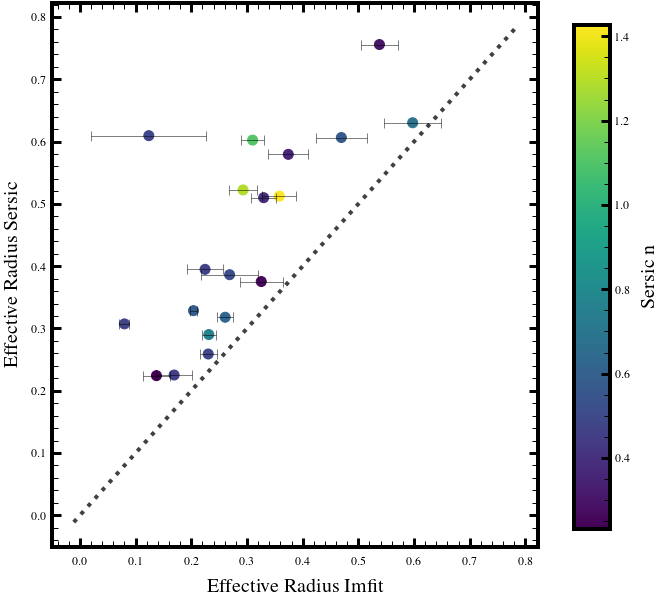

In [58]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
im = ax.scatter(morph_df['reff'], np.array(morph_df['sersic_rhalf'])*0.045, c = morph_df['sersic_n'], marker = 'o')
ax.errorbar(morph_df['reff'], np.array(morph_df['sersic_rhalf'])*0.045, xerr = morph_df['reff_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.set_xlabel("Effective Radius Imfit")
ax.set_ylabel("Effective Radius Sersic")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, ':', color = 'black',alpha=0.75, zorder=0)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel("Sersic n")

In [59]:
%store -r offsets

In [60]:
df = comparison[comparison['id'].isin(offsets.keys())].copy()

In [61]:
subms_df = df[df['id'].isin(sub_ms)]
ms_df = df[df['id'].isin(ms)]
sb_df = df[df['id'].isin(sb)]

In [62]:
sfr_sm_df = comparison[comparison['id'].isin(morph_df.index)].reset_index(drop = True)
morph_df['id'] = morph_df.index

In [64]:
markers = []
for ind,row in morph_df.iterrows():
    if row['id'] in sub_ms:
        markers.append("o")
    elif row['id'] in ms:
        markers.append("*")
    elif row['id'] in sb:
        markers.append("P")

In [67]:
morpho = []
for ind,row in morph_df.iterrows():
    if row['id'] in tail:
        morpho.append(0)
    elif row['id'] in disk:
        morpho.append(1)
    elif row['id'] in other:
        morpho.append(2)
morph_df['morpho'] = morpho

In [68]:
tail = ["CDFS-18", "ES1-25", "ES1_z_0.99", "ES1_z_1.40", "XMM-11", "XMM_z_0.9", "XMM_z_1.0"]
disk = ["ES1_z_0.99b", "ES1_z_1.65", "ES1_z_1.70", "XMM-29"]
other = ["ES1-18", "ES1-34", "ES1_z_0.88", "ES1_z_1.04", "ES1_z_1.38", "ES1_z_1.60", "XMM_113", "XMM_z_0.81"]

In [69]:
morph_df['markers'] = markers

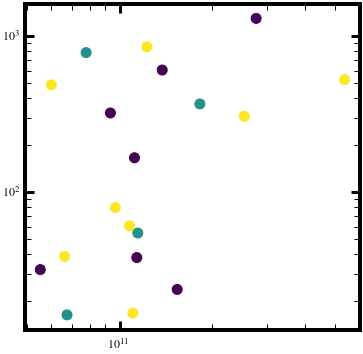

In [71]:
plt.figure(figsize = (6,6))
plt.scatter(sfr_sm_df['Stellar_mass'], sfr_sm_df['SFR'], c = morph_df['morpho'])
plt.xscale("log")
plt.yscale("log")

In [72]:
reqd_sfr = sfr_sm_df[['id', 'SFR', 'Stellar_mass', 'SFR_err', 'Stellar_mass_err', "sSFR", "redshift"]]
reqd_morph = morph_df[['id', 'sersic_n', 'sersic_rhalf', 'reff', 'S/N', 'morpho']]
reqd_morph.index = reqd_sfr.index

In [73]:
plot_df = pd.merge(reqd_morph, reqd_sfr, on = "id")

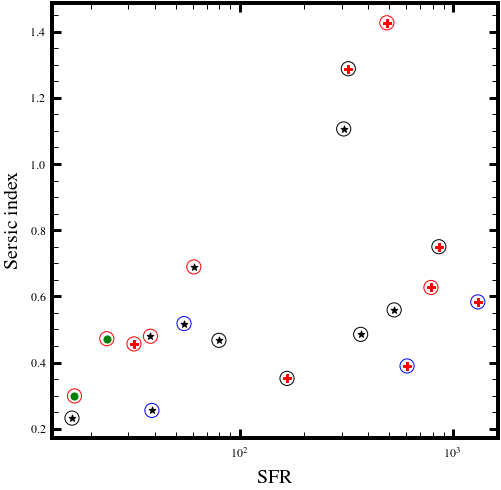

In [74]:
fig,ax = plt.subplots(1,1, figsize = (8,8))
lines = []
for ind,row in plot_df.iterrows():
    if row['id'] in tail:
        l1 = ax.scatter(row['SFR'], row['sersic_n'], marker = 'o', color = 'red', facecolor = 'none', s = 200, label = 'tail')
    if row['id'] in disk:
        l2 = ax.scatter(row['SFR'], row['sersic_n'], marker = 'o', color = 'blue', facecolor = 'none',s = 200, label = 'disk')
    if row['id'] in other:
        l3 = ax.scatter(row['SFR'], row['sersic_n'], marker = 'o', color = 'black', facecolor = 'none',s = 200, label = 'other')
    if row['id'] in sub_ms:
        l4 = ax.scatter(row['SFR'], row['sersic_n'], marker = 'o', color = 'green', s = 50, label = 'sub-MS')
    if row['id'] in ms:
        l5 = ax.scatter(row['SFR'], row['sersic_n'], marker = '*', color = 'black', s = 50, label = 'MS')
    if row['id'] in sb:
        l6 = ax.scatter(row['SFR'], row['sersic_n'], marker = 'P', color = 'red', s = 50, label = 'SB')
plt.xlabel('SFR')
plt.ylabel("Sersic index")
plt.xscale('log')

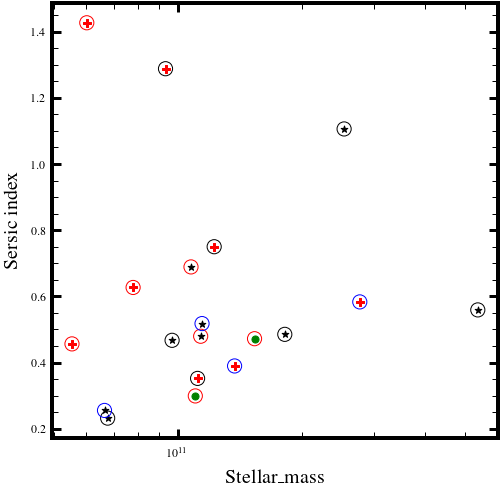

In [75]:
fig,ax = plt.subplots(1,1, figsize = (8,8))
lines = []
for ind,row in plot_df.iterrows():
    if row['id'] in tail:
        l1 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = 'o', color = 'red', facecolor = 'none', s = 200, label = 'tail')
    if row['id'] in disk:
        l2 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = 'o', color = 'blue', facecolor = 'none',s = 200, label = 'disk')
    if row['id'] in other:
        l3 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = 'o', color = 'black', facecolor = 'none',s = 200, label = 'other')
    if row['id'] in sub_ms:
        l4 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = 'o', color = 'green', s = 50, label = 'sub-MS')
    if row['id'] in ms:
        l5 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = '*', color = 'black', s = 50, label = 'MS')
    if row['id'] in sb:
        l6 = ax.scatter(row['Stellar_mass'], row['sersic_n'], marker = 'P', color = 'red', s = 50, label = 'SB')
plt.xlabel('Stellar_mass')
plt.ylabel("Sersic index")
plt.xscale('log')

In [76]:
alma_flux = pd.read_csv("alma_fluxes_detections.csv", delimiter = ",", names = ["id", "flux", "err"])

In [77]:
flux_tab = pd.merge(alma_flux, morph_df[["id", "S/N", "reff", "reff_err"]], on = "id").sort_values(by = "id").reset_index(drop = True)

In [78]:
flux = []
R_e = []
z = []
for ind,row in flux_tab.iterrows():
    flux.append(str(row['flux']) + " +/- " + str(row['err']))
    R_e.append("{:.2e}".format(row['reff']) + " +/- " + "{:.2e}".format(row['reff_err']))
    z.append(df.loc[df['id'] == row['id']]['redshift'].values[0])

In [79]:
S_N = np.array(flux_tab['S/N'])
name = np.array(flux_tab['id'])

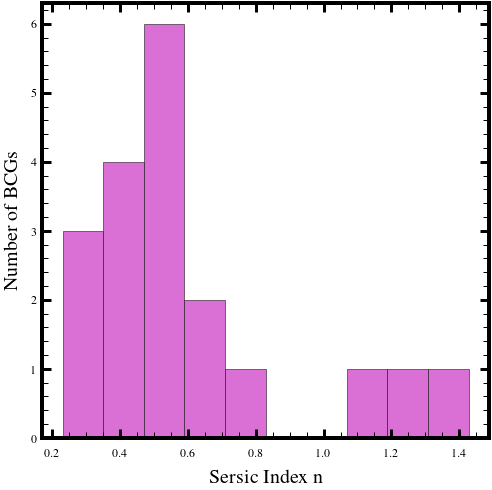

In [81]:
plt.style.use(['science', "stylesheet.txt"])
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(plot_df['sersic_n'], bins = 10, histtype = 'bar',facecolor = 'orchid', edgecolor='black', linewidth=0.5)
plt.xlabel("Sersic Index n")
plt.ylabel("Number of BCGs")
plt.savefig("/Users/arames52/Desktop/sersicn.png", dpi = 300)

In [82]:
imfit = pd.merge(flux_tab, plot_df[['id','redshift']], on = "id")

In [83]:
save_flux_tab = pd.DataFrame({"BCG":name, "S/N": S_N, "$S_{ALMA}$" : flux, "$R_e$": R_e, "redshift" : z})

In [84]:
# save_flux_tab.to_csv("/Users/arames52/Desktop/alma_flux.csv", index = False)

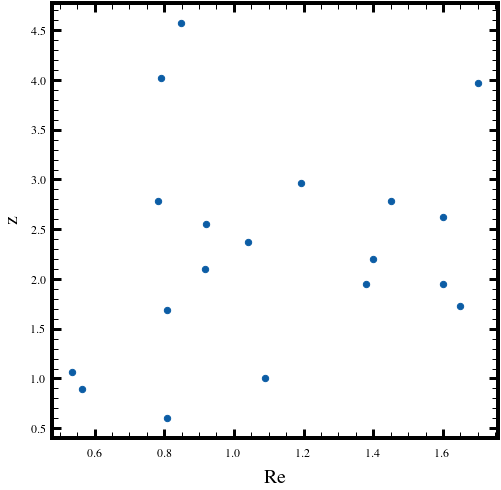

In [105]:
plt.figure(figsize = (8,8))
im = plt.scatter(imfit['redshift'], imfit['r_e_kpc'], marker = "o", s = 40)
# # plt.errorbar(plot_morph['r_e_kpc'], plot_morph['flux'], xerr = plot_morph['reff_err'], yerr = flux_tab['err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# cbar = plt.colorbar(im)
# cbar.ax.set_ylabel('Redshift')
plt.ylabel("z")
# plt.xlabel("log Flux [mJy]")
plt.xlabel("Re")
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(10**-1)
plt.savefig("/Users/arames52/Desktop/flux_re.jpg", dpi = 300)

In [87]:
plot_morph = pd.merge(flux_tab, comparison, on = "id")

In [88]:
plot_morph = pd.merge(plot_morph, morph_df, on = "id")

In [89]:
plot_morph['r_e_kpc'] = cosmo.kpc_proper_per_arcmin(np.array(plot_morph['redshift']))*(plot_morph['reff_x']/60)

In [91]:
fwhm_major = cosmo.kpc_proper_per_arcmin(np.array(plot_morph['redshift']))*(plot_morph['casa_major_fwhm'].values/60)
fwhm_minor = cosmo.kpc_proper_per_arcmin(np.array(plot_morph['redshift']))*(plot_morph['casa_minor_fwhm'].values/60)

In [92]:
plot_morph['r_e_fwhm'] = np.sqrt(fwhm_major*fwhm_minor)/2

Text(0.5, 0, 'sSFR')

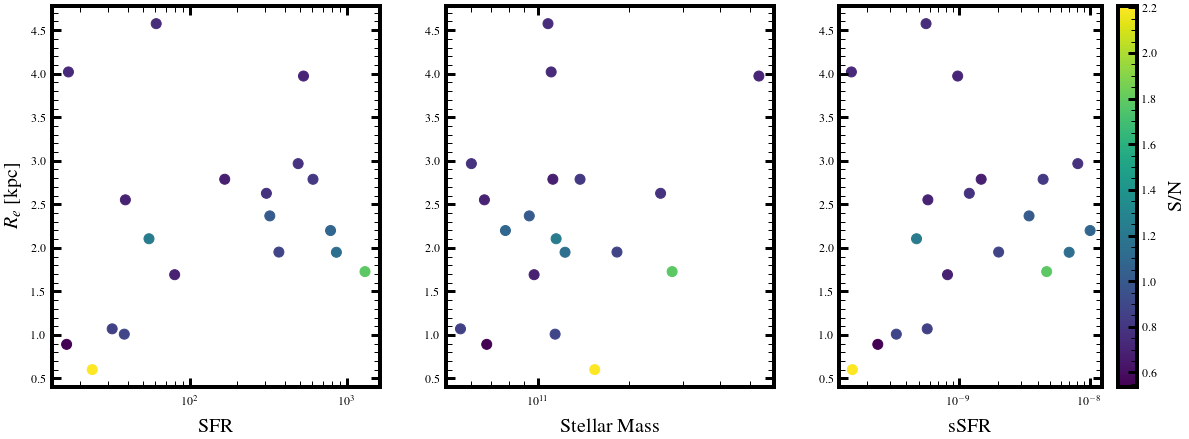

In [93]:
fig,ax = plt.subplots(1,3, figsize = (20,7))
ax = ax.ravel()
im = ax[0].scatter(plot_morph['SFR'],plot_morph['r_e_fwhm'],c = np.log10(plot_morph['S/N_x']))
ax[1].scatter(plot_morph['Stellar_mass'],plot_morph['r_e_fwhm'],c = np.log10(plot_morph['S/N_x']))
ax[2].scatter(plot_morph['sSFR'],plot_morph['r_e_fwhm'],c = np.log10(plot_morph['S/N_x']))
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
cbar = plt.colorbar(im, ax = ax[2])
cbar.ax.set_ylabel('S/N')
ax[0].set_xlabel("SFR")
ax[0].set_ylabel("$R_e$ [kpc]")
ax[1].set_xlabel("Stellar Mass")
ax[2].set_xlabel("sSFR")
# ax[3].set_axis_off()

In [94]:
plot_morph

,id,flux,err,S/N_x,reff_x,reff_err_x,index,SFR,SFR_err,Stellar_mass,...,casa_minor_fwhm,casa_minor_fwhm_err,reff_y,reff_r20,reff_err_y,S/N_y,morpho,markers,r_e_kpc,r_e_fwhm
0,CDFS-18,4.226,0.059,160.000000,0.079903,0.008962,0,23.790637,4.625673,1.537569e+11,...,0.113,0.049,0.079903,2.5,0.008962,160.000000,0,o,0.601813,0.601813
1,ES1-18,0.180,0.029,4.880000,0.224683,0.031805,3,79.747198,23.427413,9.692398e+10,...,0.318,0.161,0.224683,2.5,0.031805,4.880000,2,*,1.691716,1.691716
2,ES1-25,0.258,0.050,7.640000,0.123693,0.103356,4,38.085378,24.756857,1.137372e+11,...,0.060,0.200,0.123693,2.5,0.103356,7.640000,0,*,1.008725,1.008725
3,ES1-34,0.853,0.155,5.090000,0.469415,0.045875,6,527.775991,44.067429,5.363627e+11,...,0.780,0.230,0.469415,2.5,0.045875,5.090000,2,*,3.973253,3.973253
4,ES1_z_0.88,0.106,0.030,3.441550,0.137368,0.024312,13,16.339344,1.017821,6.758220e+10,...,0.204,0.121,0.137368,2.5,0.024312,3.441550,2,*,0.891643,0.891643
5,ES1_z_0.99,0.357,0.078,5.992563,0.358095,0.030420,14,487.995269,95.672200,6.013037e+10,...,0.624,0.154,0.358095,2.5,0.030420,5.992563,0,P,2.967228,2.967228
6,ES1_z_0.99b,0.288,0.081,4.995727,0.325616,0.038526,15,38.697070,11.637309,6.639960e+10,...,0.492,0.178,0.325616,2.5,0.038526,4.995727,1,*,2.551545,2.551545
7,ES1_z_1.04,0.470,0.084,10.134273,0.292968,0.024951,16,321.973131,137.118066,9.342061e+10,...,0.358,0.100,0.292968,2.5,0.024951,10.134273,2,P,2.367032,2.367032
8,ES1_z_1.38,0.515,0.057,13.633839,0.231430,0.012650,17,855.147175,193.200457,1.226651e+11,...,0.412,0.067,0.231430,2.5,0.012650,13.633839,2,P,1.949265,1.949265
9,ES1_z_1.40,0.465,0.058,12.067338,0.260799,0.014590,18,784.974270,96.190048,7.792455e+10,...,0.436,0.074,0.260799,2.5,0.014590,12.067338,0,P,2.198921,2.198921


In [95]:
plot_morph['sersic_r_e'] = plot_morph['sersic_rhalf']*0.045

In [96]:
plot_morph['seric_r_e_kpc'] = cosmo.kpc_proper_per_arcmin(np.array(plot_morph['redshift']))*(plot_morph['sersic_r_e']/60)

In [97]:
plot_morph[(plot_morph['r_e_fwhm']>4)][['id','sersic_n','r_e_kpc','redshift', 'seric_r_e_kpc']]

,id,sersic_n,r_e_kpc,redshift,seric_r_e_kpc
13,XMM-11,0.299046,4.020417,0.79000,5.649831
17,XMM_z_0.9,0.688988,4.574938,0.84957,4.825509


In [98]:
plot_morph[~(plot_morph['r_e_fwhm']<1.5)][['id','sersic_n','r_e_kpc','redshift', 'seric_r_e_kpc']]

,id,sersic_n,r_e_kpc,redshift,seric_r_e_kpc
1,ES1-18,0.467166,1.691716,0.806800,2.972993
3,ES1-34,0.559053,3.973253,1.700000,5.133771
5,ES1_z_0.99,1.426921,2.967228,1.193720,4.245744
6,ES1_z_0.99b,0.255234,2.551545,0.918860,2.940714
7,ES1_z_1.04,1.288067,2.367032,1.040000,4.220399
8,ES1_z_1.38,0.750043,1.949265,1.380000,2.443999
9,ES1_z_1.40,0.626891,2.198921,1.400000,2.680928
10,ES1_z_1.60,0.485195,1.951522,1.600000,2.193499
11,ES1_z_1.65,0.583252,1.727232,1.650000,2.783018
12,ES1_z_1.70,0.517765,2.104650,0.916510,3.024765


In [99]:
plot_morph[(plot_morph['r_e_fwhm']<1.5)][['id','sersic_n','r_e_kpc','redshift', 'reff_x','seric_r_e_kpc']]

,id,sersic_n,r_e_kpc,redshift,reff_x,seric_r_e_kpc
0,CDFS-18,0.472049,0.601813,0.807580,0.079903,2.314712
2,ES1-25,0.479464,1.008725,1.088070,0.123693,4.970657
4,ES1_z_0.88,0.231999,0.891643,0.563950,0.137368,1.455345
18,XMM_z_1.0,0.456353,1.069745,0.535235,0.169152,1.424222


In [100]:
imfit['r_e_kpc'] = cosmo.kpc_proper_per_arcmin(np.array(imfit['redshift']))*(imfit['reff']/60)

In [101]:
sub_ms_plot = plot_df[plot_df['id'].isin(sub_ms)]
ms_plot = plot_df[plot_df['id'].isin(ms)]
sb_plot = plot_df[plot_df['id'].isin(sb)]

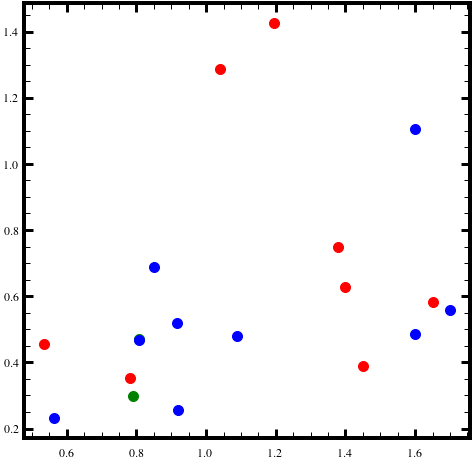

In [102]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.scatter(sub_ms_plot['redshift'], sub_ms_plot['sersic_n'], color = 'green')
ax.scatter(ms_plot['redshift'], ms_plot['sersic_n'], color = 'blue')
ax.scatter(sb_plot['redshift'], sb_plot['sersic_n'], color = 'red')
# ax.set_xscale("log")

In [103]:
sersic_params = plot_morph[["id","sersic_n", "sersic_ellip", "sersic_rhalf", "redshift", "flux", "S/N_x"]].copy()

In [152]:
%store plot_morph
%store sersic_params

Stored 'plot_morph' (DataFrame)
Stored 'sersic_params' (DataFrame)


In [106]:
plot_morph

,id,flux,err,S/N_x,reff_x,reff_err_x,index,SFR,SFR_err,Stellar_mass,...,reff_y,reff_r20,reff_err_y,S/N_y,morpho,markers,r_e_kpc,r_e_fwhm,sersic_r_e,seric_r_e_kpc
0,CDFS-18,4.226,0.059,160.000000,0.079903,0.008962,0,23.790637,4.625673,1.537569e+11,...,0.079903,2.5,0.008962,160.000000,0,o,0.601813,0.601813,0.307325,2.314712
1,ES1-18,0.180,0.029,4.880000,0.224683,0.031805,3,79.747198,23.427413,9.692398e+10,...,0.224683,2.5,0.031805,4.880000,2,*,1.691716,1.691716,0.394854,2.972993
2,ES1-25,0.258,0.050,7.640000,0.123693,0.103356,4,38.085378,24.756857,1.137372e+11,...,0.123693,2.5,0.103356,7.640000,0,*,1.008725,1.008725,0.609518,4.970657
3,ES1-34,0.853,0.155,5.090000,0.469415,0.045875,6,527.775991,44.067429,5.363627e+11,...,0.469415,2.5,0.045875,5.090000,2,*,3.973253,3.973253,0.606522,5.133771
4,ES1_z_0.88,0.106,0.030,3.441550,0.137368,0.024312,13,16.339344,1.017821,6.758220e+10,...,0.137368,2.5,0.024312,3.441550,2,*,0.891643,0.891643,0.224213,1.455345
5,ES1_z_0.99,0.357,0.078,5.992563,0.358095,0.030420,14,487.995269,95.672200,6.013037e+10,...,0.358095,2.5,0.030420,5.992563,0,P,2.967228,2.967228,0.512391,4.245744
6,ES1_z_0.99b,0.288,0.081,4.995727,0.325616,0.038526,15,38.697070,11.637309,6.639960e+10,...,0.325616,2.5,0.038526,4.995727,1,*,2.551545,2.551545,0.375280,2.940714
7,ES1_z_1.04,0.470,0.084,10.134273,0.292968,0.024951,16,321.973131,137.118066,9.342061e+10,...,0.292968,2.5,0.024951,10.134273,2,P,2.367032,2.367032,0.522360,4.220399
8,ES1_z_1.38,0.515,0.057,13.633839,0.231430,0.012650,17,855.147175,193.200457,1.226651e+11,...,0.231430,2.5,0.012650,13.633839,2,P,1.949265,1.949265,0.290169,2.443999
9,ES1_z_1.40,0.465,0.058,12.067338,0.260799,0.014590,18,784.974270,96.190048,7.792455e+10,...,0.260799,2.5,0.014590,12.067338,0,P,2.198921,2.198921,0.317966,2.680928
